In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 준비


In [41]:
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-mpg.csv')

In [42]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# 데이터 탐색

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [44]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [45]:
# 누락 데이터 확인
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [46]:
# 중복 데이터 확인
df.duplicated().sum()

np.int64(0)

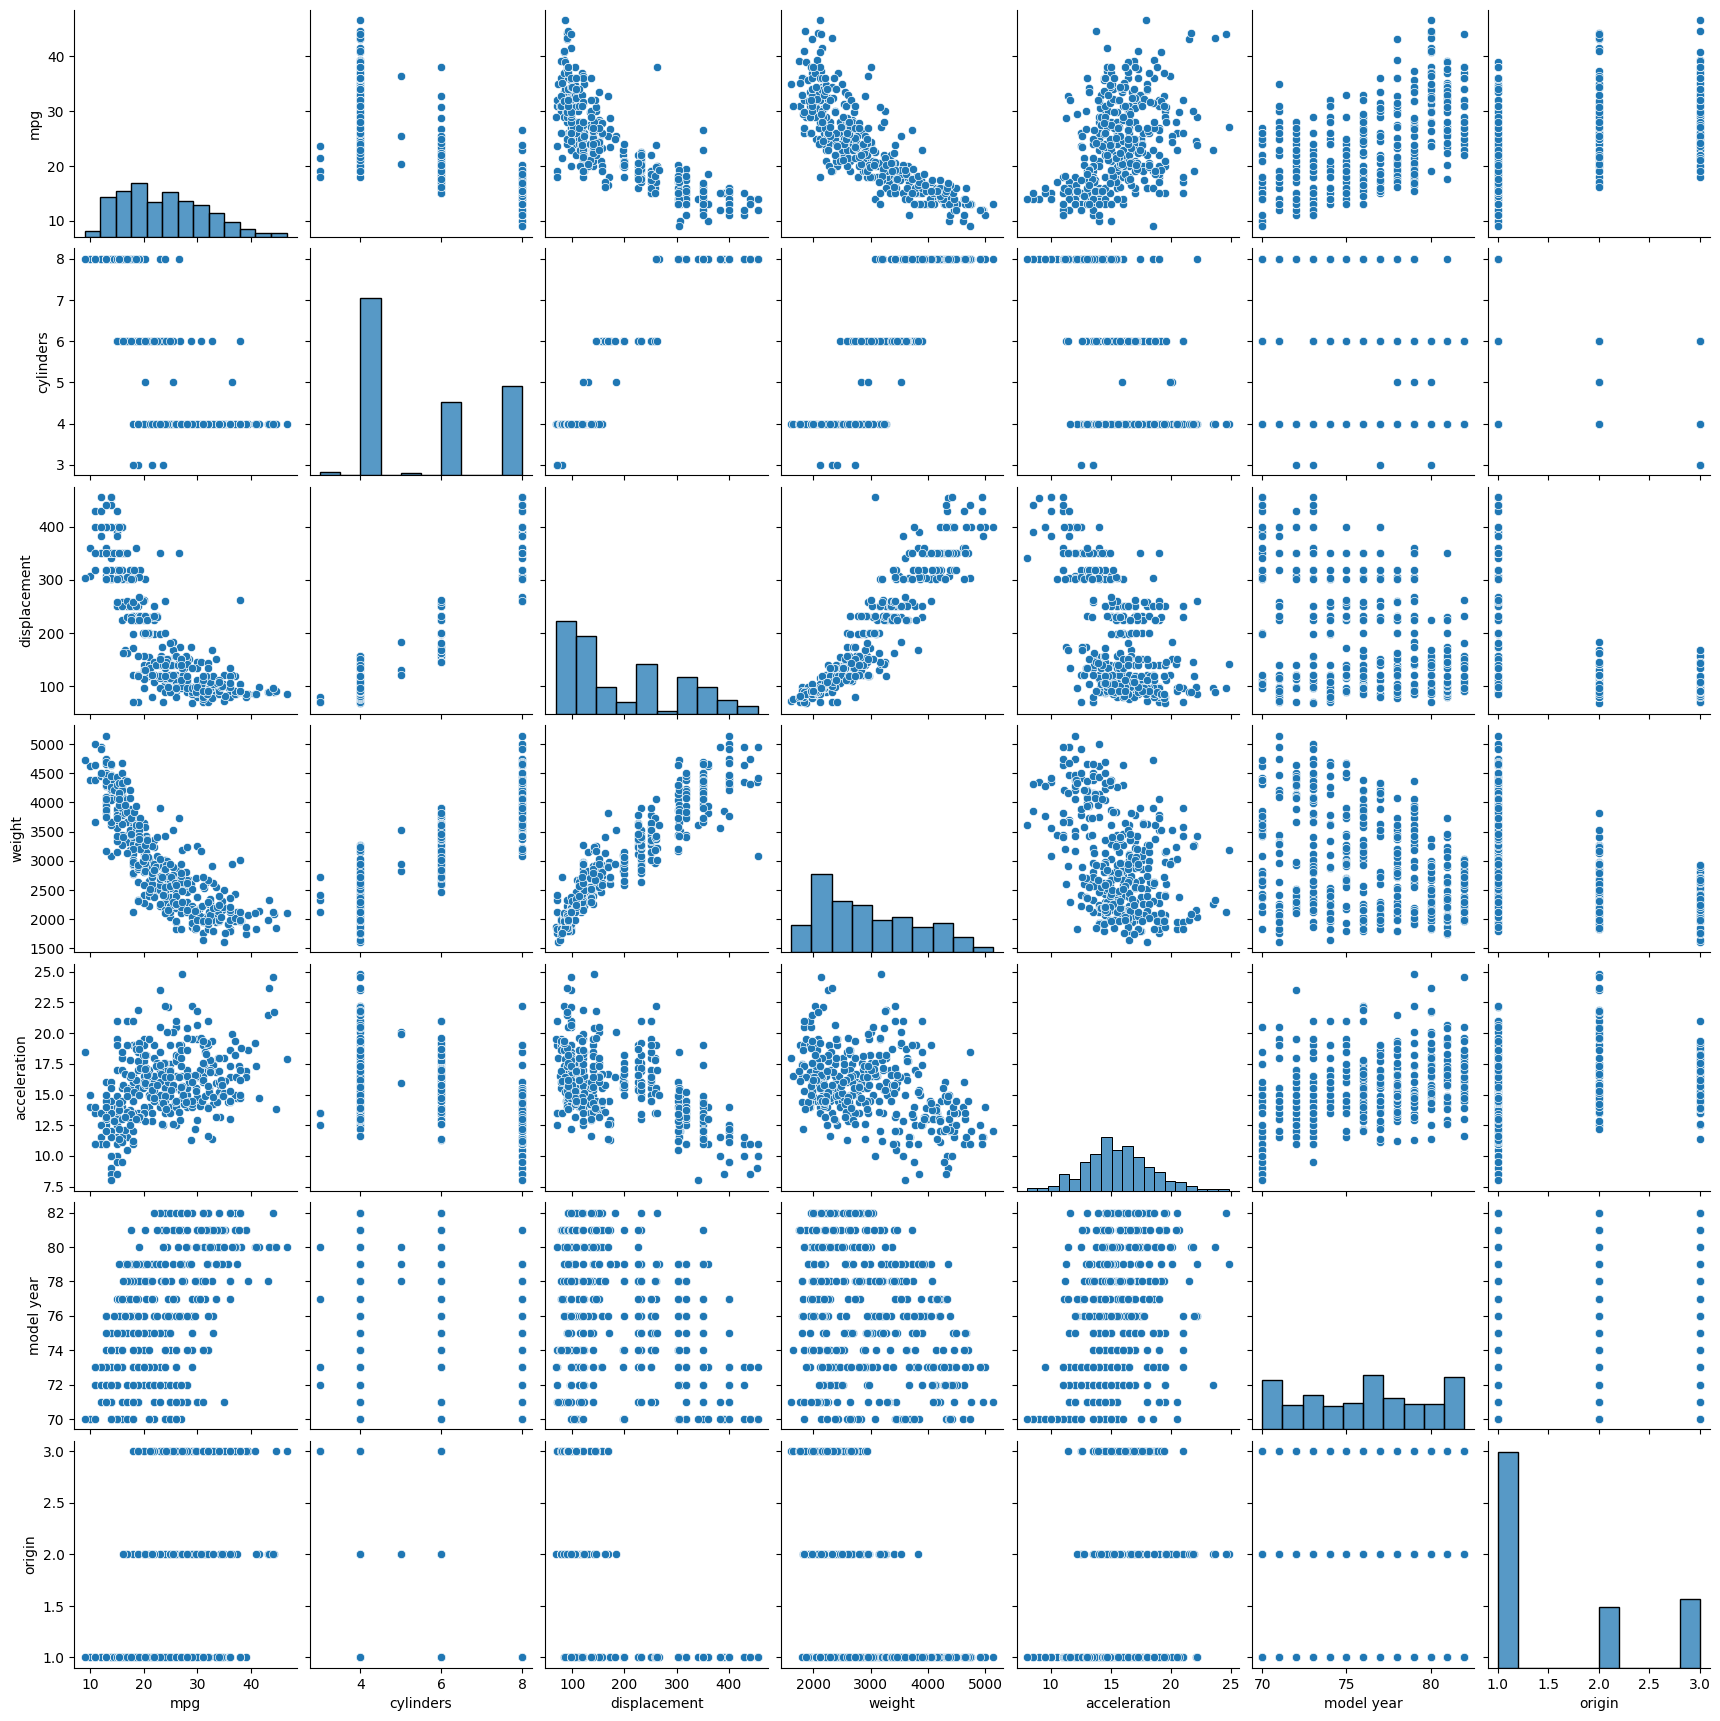

In [47]:
# seaborn pairplot
sns.pairplot(df);

In [48]:
# 상관계수 분석
# numeric_only=True: 상관계수를 계산할 때 숫자형(numeric) 데이터만 사용하겠다는 의미
# 양의 상관관계: 한 쪽이 증가하면 다른 쪽도 증가
# 음의 상관관계: 한 쪽이 증가하면 다른 쪽은 감소
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


annot=True: 각 셀 안에 상관계수 수치를 출력함

fmt=".2f": 소수점 둘째자리까지 출력

cbar=True: 오른쪽에 색상 바(color bar)를 표시하여 값의 범위를 시각적으로 보여줌



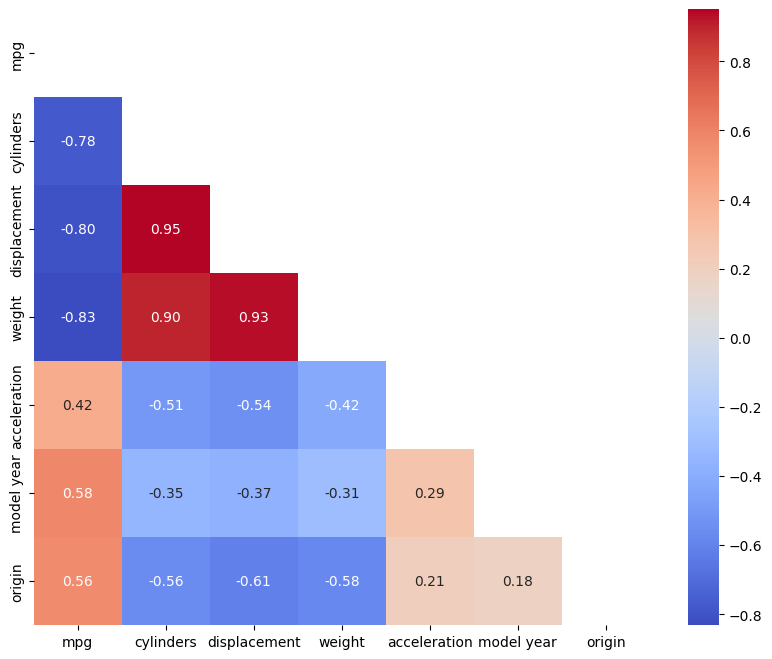

In [55]:
# 상관계수 분석 - 히트맵

# 마스크 생성 (상단 트라이앵글 숨김)
# 상관계수 행렬은 대칭이기 때문에, 전체를 다 보여줄 필요 없이 절반만 시각화해도 충분
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap='coolwarm',
            annot=True, fmt=".2f", cbar=True, square=True)
plt.show()

# 데이터 전처리

In [50]:
# horsepower 열의 고유값 확인
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [51]:
# '?'를 np.nan으로 변경
# horsepower 열의 자료형 변경 (문자열->숫자)
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype('float')

In [52]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [53]:
# 결측치 제거
#print(df['horsepower'].isnull().sum())
#df_nan = df.dropna(subset=['horsepower'],axis=0)
#print(df_nan['horsepower'].isnull().sum())

In [54]:
# 결측치 대체
print(df['horsepower'].isnull().sum())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
print(df['horsepower'].isnull().sum())

6
0


In [29]:
# 상관계수 분석
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


# 변수선택

In [30]:
# 부넉에 활용할 열 (속성) 선택 (연비, 실린더, 출력, 증량)
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


<Axes: xlabel='weight', ylabel='mpg'>

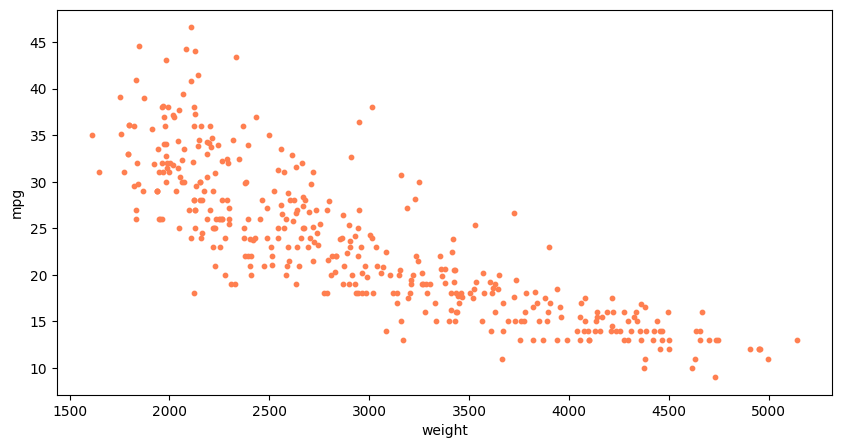

In [31]:
# 종속 변수 y인 mpg와 다른 변수 간의 선형관계를 그래프로 확인
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))

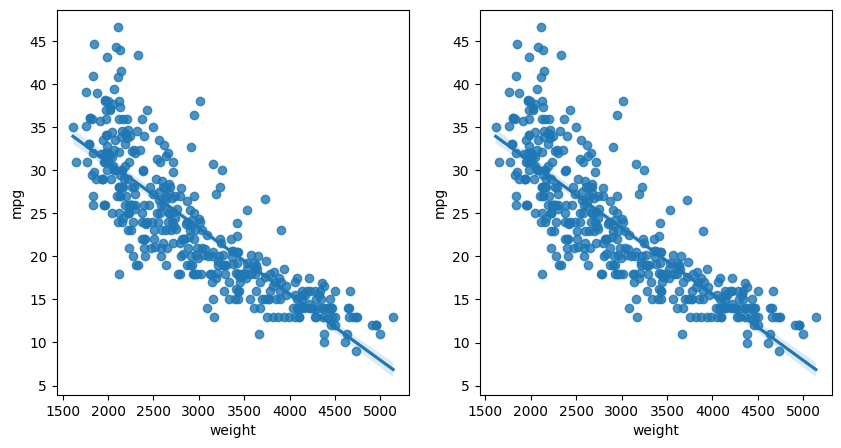

In [32]:
# seaborn 으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열 중 1번째 위치
ax2 = fig.add_subplot(1,2,2) # 1행 2열 중 2번째 위치
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1, fit_reg=True) # 회귀선을 제거하려면 False
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=True)
plt.show()

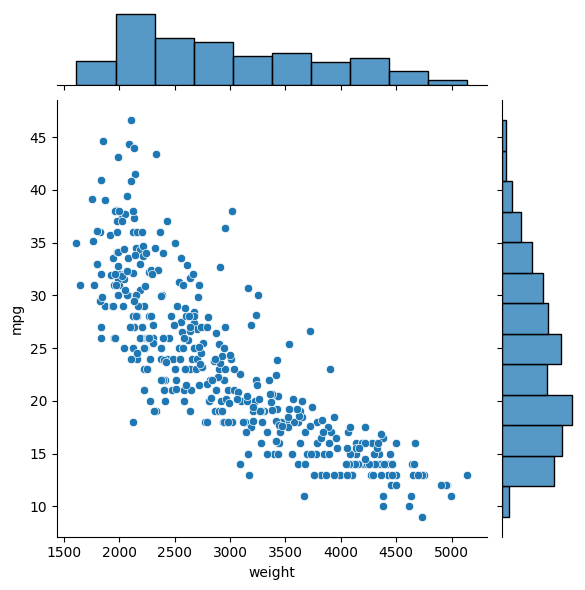

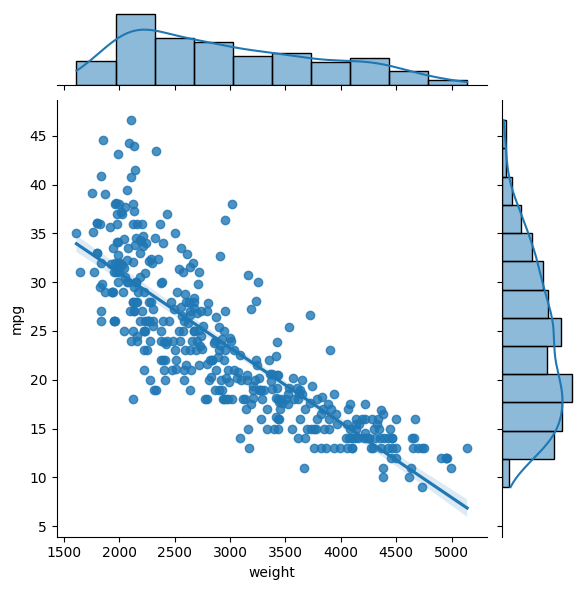

In [33]:
# seaborn 조인트 그래프
sns.jointplot(x='weight', y='mpg', data=ndf) # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf) # 회귀선 표시

# 훈련/검증 데이터 분할

In [34]:
# 속성(변수) 선택
X=ndf[['weight']] # 독립변수
Y=ndf[['mpg']] # 종속변수

# train data와 test data로 구분 (7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
print('train data 개수:', len(X_train))
print('train data 개수:', len(X_test))

train data 개수: 278
train data 개수: 120


# 모델 학습 및 검증

결정계수: 모델이 전체 데이터의 변동성을 얼마나 잘 설명하는가? 를 나타내는 수치

이때 R² = 0.85 라면, 85%의 연비 변화를 자동차 무게로 설명할 수 있다는 뜻!

In [35]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀번석 모델 객체 생성
lr = LinearRegression()

# train data를 가지고 모델 학습
lr.fit(X_train, Y_train) # 학습에 사용되는 입력 데이터, 출력 데이터

# 학습을 마친 모델에 test data를 적용하여 결정계수 계산
r_square = lr.score(X_test, Y_test)
print('결정계수:', r_square)

결정계수: 0.689363809315209


In [36]:
# 회귀식의 기울기
print('기울기 a', lr.coef_)
print('y절편 b',lr.intercept_)

기울기 a [[-0.0076554]]
y절편 b [46.60365052]


In [37]:
# 모델에 test data 데이터를 입력하여 예측한 값 y_hat을 실제 y와 비교
y_hat = lr.predict(X_test) # 학습된 모델 lr이 X_test를 보고 예측한 종속변수

# 오차 계산
test_preds = pd.DataFrame(Y_test)
test_preds.columns = ['Y_test']
test_preds['y_hat'] = y_hat
# 실제값(Y_test)과 예측값(y_hat)을 비교
test_preds['squared_error'] = (test_preds['y_hat'] - test_preds['Y_test']) ** 2
test_preds

,Y_test,y_hat,squared_error
331,33.8,30.182824,13.083965
111,18.0,30.343587,152.364137
350,34.7,29.646946,25.533357
205,28.0,30.106270,4.436372
56,26.0,31.637349,31.779704
...,...,...,...
17,21.0,26.799138,33.630001
225,17.5,19.656652,4.651150
223,15.5,14.910306,0.347739
59,23.0,29.348385,40.301995


In [38]:
# 평균 제곱 오차
# 예측이 얼마나 틀렸는지를 수치로 계산하는 것
mse = test_preds['squared_error'].mean()
print('mse:', mse)

mse: 17.898336128759947


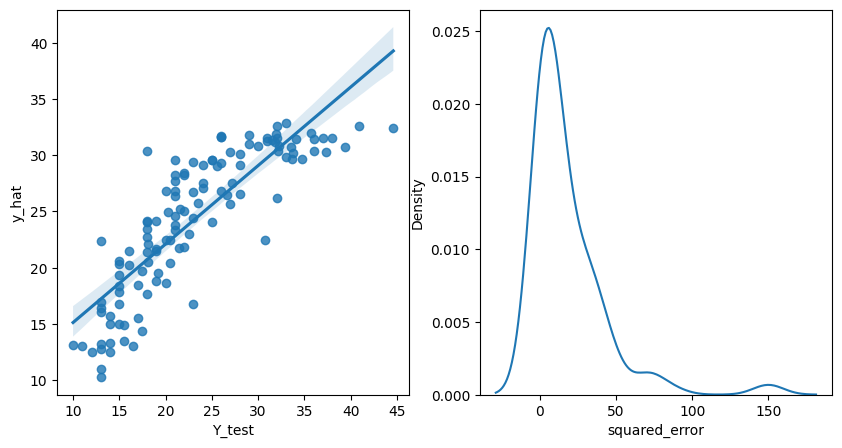

In [39]:
# 오차 분석
fig, axes = plt.subplots(1,2, figsize=(10,5)) # 1행 2열 구조
sns.regplot(x='Y_test', y='y_hat', data=test_preds, ax=axes[0]);
# 그래프가 왼쪽에 뾰족하게 치우쳐 있으면 → 예측이 전반적으로 정확하다는 뜻
# 커널 밀도 추정을 이용해 데이터 분포를 부드럽게 표현
sns.kdeplot(x='squared_error', data=test_preds, ax=axes[1]);